# Soft Actor-Critic: Simulations and plots

In [1]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrandom

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="darkgrid", palette="deep")
palette = sns.color_palette().as_hex()

import pickle

# import local libraries
from environments.linear import Linear_SDI
from environments.box import Box_SDI
from environments.box import Box2_SDI
from environments.orbit import Orbital_SDI
from src.utilities.run_trial import run_trial

from src.OptimalControl.LQR import LQRSolver
from src.OptimalControl.utilities.run import run_LQR

## Linear SDI

In [8]:
from src.SoftActorCritic.main import SACAgent

# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [.5] #[0, .1, .2, .3]
method = 'SAC'
system = 'linear'
name = 'SAC_linear'


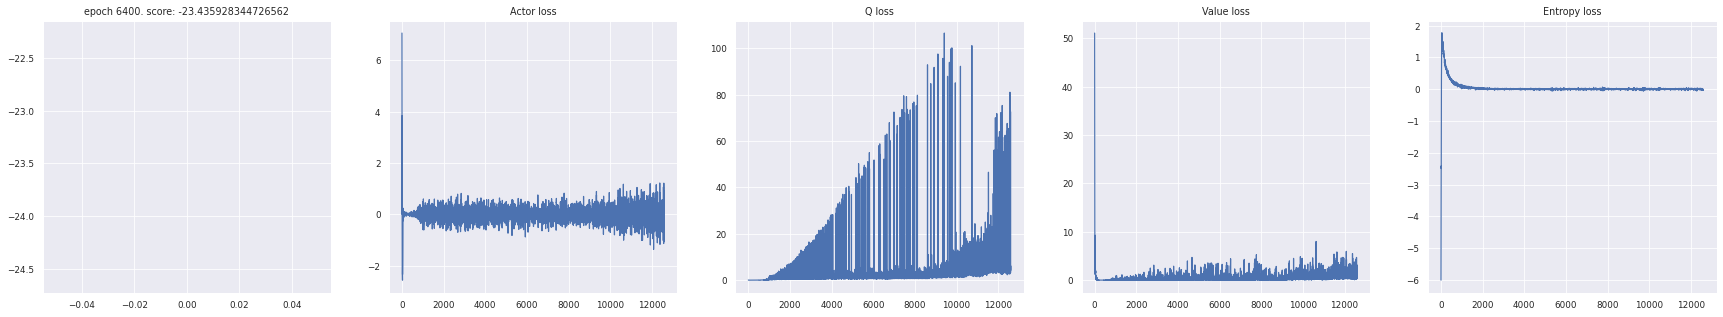

KeyboardInterrupt: 

In [70]:
# RUN
PARAMS = {name:{}}

for lvl in range(1):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(2, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Linear_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-4,
            gamma=gamma
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor.model,
                        'q1': agent.QF1.model,
                        'q2': agent.QF2.model,
                        'v': agent.VF.model,
                        'vt': agent.VF_target.model}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Orbital SDI

In [11]:
from src.SoftActorCritic.main import SACAgent

# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 10
Nep = 10000
noise_lvl = [0] #[0, .1, .2, .3]
method = 'SAC'
system = 'orbital'
name = 'SAC_orbital'


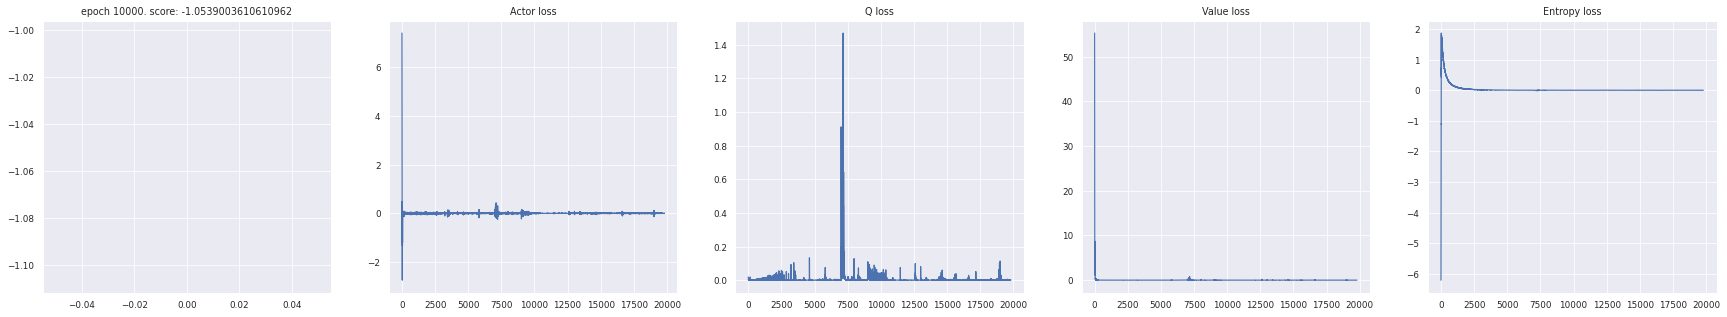

In [ ]:
# RUN
PARAMS = {name:{}}

for lvl in range(1):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(0, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Box_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor.model,
                        'q1': agent.QF1.model,
                        'q2': agent.QF2.model,
                        'v': agent.VF.model,
                        'vt': agent.VF_target.model}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Box constrained particle

In [2]:
from src.SoftActorCritic.main import SACAgent

# PARAMETERS
gamma = .93

memory_size = 5000
batch_size = 64
initial_random_steps = 0

control_limit = 4.
state_scale = 5
obs_size = 2
ctrl_size = 1

n_trials = 5
Nep = 10000
noise_lvl = [.5] #[.1, .2, .3, .4, .5]
method = 'SAC'
system = 'box'
name = 'SAC_box'


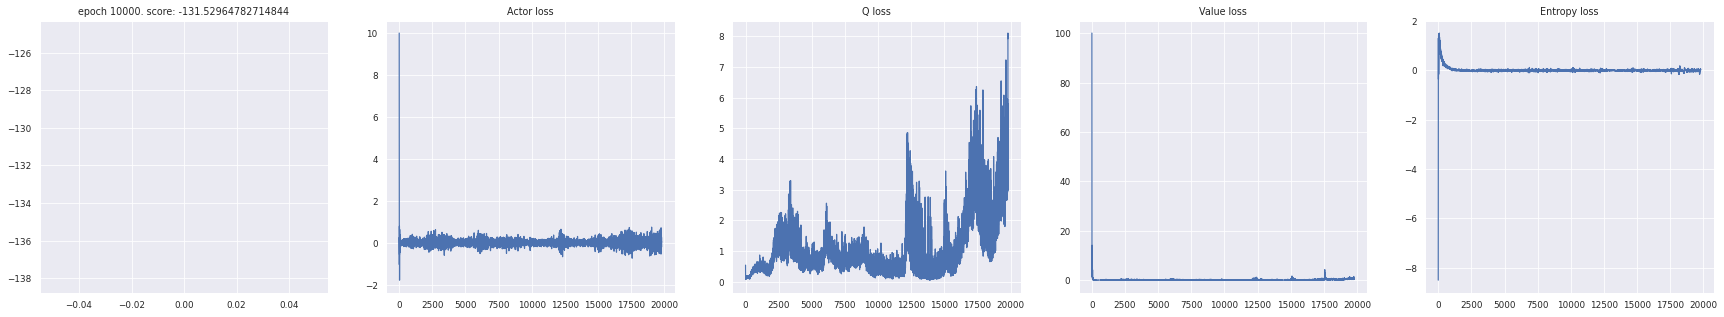

KeyboardInterrupt: 

In [3]:
# RUN
PARAMS = {name:{}}

for lvl in range(4):
    PARAMS[name][f'{noise_lvl[lvl]}'] = []
    for idx in range(2, n_trials):
        PARAMS[name][f'{noise_lvl[lvl]}'] += [{}]

        np.random.seed(idx+2)
        key = jrandom.PRNGKey(idx+2)

        env = Box_SDI()
        env.v = jnp.identity(2) * noise_lvl[lvl]

        agent = SACAgent(
            env, memory_size, key,
            initial_random_steps=initial_random_steps,
            obs_size=obs_size,
            ctrl_size=ctrl_size,
            control_limit=control_limit,
            epochs_per_step=2,
            lr=7e-3,
            memory_decay=5e-3,
            gamma=gamma,
            linear_policy = False
        )

        for factor in range(1, int(Nep/200)+1):
            agent.train(200, key, plotting_interval=200, record=True)

            params = {'pi': agent.actor.model,
                        'q1': agent.QF1.model,
                        'q2': agent.QF2.model,
                        'v': agent.VF.model,
                        'vt': agent.VF_target.model}

            filename = f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}/{idx}.pickle'

            if not os.path.isdir(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}'):
                os.makedirs(f'models/{method}/{system}/{noise_lvl[lvl]}/{factor*200}')
            with open(filename, 'wb') as handle:
                pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)


## Stable Baselines (SAC)

In [2]:
from stable_baselines3 import SAC
from environments.box import Box2_SDI

env = Box2_SDI()
env.v = jnp.identity(2) * 0

model = SAC("MlpPolicy", env, verbose=1,
            buffer_size=5000, batch_size=64,
            learning_rate=7e-3, gamma=.93, gradient_steps=2,
            tau=5e-4)
model.learn(total_timesteps=10000, log_interval=4)
model.save("sb_sac_box")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------
| rollout/           |            |
|    ep_len_mean     | 200        |
|    ep_rew_mean     | -208.85617 |
| time/              |            |
|    episodes        | 4          |
|    fps             | 23         |
|    time_elapsed    | 34         |
|    total_timesteps | 800        |
| train/             |            |
|    actor_loss      | 1.77       |
|    critic_loss     | 0.00221    |
|    ent_coef        | 0.0258     |
|    ent_coef_loss   | 0.238      |
|    learning_rate   | 0.007      |
|    n_updates       | 1398       |
-----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -176.8517 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 21        |
|    time_elapsed    | 74        |
|    total_tim

# Generate plots

In [3]:
def run_SAC(env, controller, key, T=20, dt=.1, x0=None):
    time_space = np.arange(0, T, dt)
    X = np.zeros((len(time_space)+1, env.dim))
    Y = np.zeros((len(time_space)+1, env.dim))
    U = np.zeros((len(time_space), env.dim))
    R = np.zeros((len(time_space), env.dim))

    y = env.reset(x0=x0)

    X[0] = env.state
    Y[0] = y

    key, subkey = jrandom.split(key)
    for it, _ in enumerate(time_space):
        u, _ = controller(env.state, key)
        y, rew, _, _ = env.step(u, subkey)

        X[it+1] = env.state
        Y[it+1] = y
        U[it] = u
        R[it] = rew

        key, subkey = jrandom.split(key)
    
    return X, Y, U, R

## Linear SDI

In [4]:
from src.OptimalControl.LQR import LQRSolver
from src.OptimalControl.utilities.run import run_LQR
palette = sns.color_palette().as_hex()

seed = 0

method = 'SAC'
system = 'linear'
noise = 0
Nep = 10000

env = Linear_SDI()
env.v = jnp.identity(2) * noise

### Trajectory

In [7]:
x0 = jnp.array([10, 0])

LQR = LQRSolver(env.A, env.B, env.G, env.R)
X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
info_lqr = {'X': X, 'R': R}

info_sac = {'X': [], 'R': []}
for idx in range(10):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0)
    info_sac['X'] += [X]
    info_sac['R'] += [R]


In [8]:
env.v = jnp.identity(env.dim) * 0

N = 10

x_space = np.linspace(-10, 10, N)
v_space = np.linspace(-5, 5, N)
xv, vv = np.meshgrid(x_space, v_space)
qx = np.zeros((N,N))
qv = np.zeros((N,N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([xv[i,j], vv[i,j]])
    dx, dv = env.predict_deriv(state, 0)
    qx[i,j] = dx
    qv[i,j] = dv

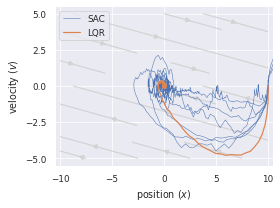

In [9]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.streamplot(xv, vv, qx, qv, density=.3, color='lightgrey')

for X in info_sac['X']:
    ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
ax.plot([], [], linewidth=.5, color=palette[0], label='SAC')

X = info_lqr['X']
ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

ax.set_xlim([-10.5, 10.5])
ax.set_ylim([-5.5, 5.5])
ax.set_xticks(np.linspace(-10, 10, 5))
ax.set_yticks(np.linspace(-5, 5, 5))

ax.set_xlabel(r'position ($x$)')
ax.set_ylabel(r'velocity ($v$)')

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
plt.savefig(figurename, dpi=300)

plt.show()

### Training convergence

In [ ]:
I = 5
J = 10
K = int(Nep/200)

key = jrandom.PRNGKey(0)
x0_space = jrandom.uniform(key, (I,2), minval=-5, maxval=5)

In [ ]:
def test_SAC(key, method, system, noise, env, x0_space, J, K, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros((I, J, K))
    for k in range(1, K+1):
        Nep = int(200*k)
        for j in range(J):
            filename = f'models/{method}/{system}/{noise}/{Nep}/{j}.pickle'
            with open(filename, 'rb') as file:
                agent = pickle.load(file)
            controller = agent['pi']
            for i, x0 in enumerate(x0_space):
                _, _, _, R = run_SAC(env, controller, keys[i], T=T, dt=dt, x0=x0)
                R[i,j,k-1] = np.sum(R)
    return np.mean(R, axis=1) / T

R = test_SAC(key, method, system, noise, env, x0_space, J, K)

In [ ]:
filename = f'models/{method}/{system}/{noise}/R.pickle'

with open(filename, 'wb') as handle:
    pickle.dump(R, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename, 'rb') as file:
    R = pickle.load(file)

In [ ]:
# Calculate average and confidence bound
average = np.mean(R, axis=0)
lower_bound = np.quantile(R, .25, axis=0)
upper_bound = np.quantile(R, .75, axis=0)

xticks = np.arange(len(average))

# plot average trajectory with confidence bound
fig, ax = plt.subplots(figsize=(4, 3))
sns.lineplot(x=xticks, y=average, ax=ax, label='SAC')
ax.fill_between(xticks, lower_bound, upper_bound, alpha=.2)

plt.xticks(xticks, [str(int((x+1)*200)) for x in xticks])

ax.set_xlabel('number of training steps')
ax.set_ylabel('average reward')

plt.show()

## Orbital

In [10]:
seed = 0

method = 'SAC'
system = 'orbital'
noise = 0
Nep = 10000

env = Orbital_SDI()
env.v = jnp.identity(2) * noise

### Trajectory

In [11]:
x0 = jnp.array([(5/6)*np.pi, 0])

LQR = LQRSolver(env.A, env.B, env.G, env.R)
X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
info_lqr = {'X': X, 'R': R}

info_sac = {'X': [], 'R': []}
for idx in range(5):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0)
    info_sac['X'] += [X]
    info_sac['R'] += [R]


In [12]:
env.v = jnp.identity(env.dim) * 0

N = 10

x_space = np.linspace(-np.pi, np.pi, N)
v_space = np.linspace(-4, 4, N)
xv, vv = np.meshgrid(x_space, v_space)
qx = np.zeros((N,N))
qv = np.zeros((N,N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([xv[i,j], vv[i,j]])
    dx, dv = env.predict_deriv(state, 0)
    qx[i,j] = dx
    qv[i,j] = dv

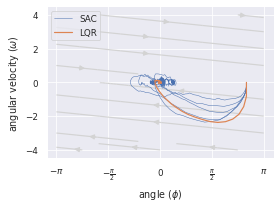

In [13]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.streamplot(xv, vv, qx, qv, density=.3, color='lightgrey')

for X in info_sac['X']:
    idx_tmp = np.where(X[:,0] <= -np.pi/2)[0]
    X[idx_tmp] += jnp.array([2*np.pi, 0])
    ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
ax.plot([], [], linewidth=.5, color=palette[0], label='SAC')

X = info_lqr['X']
idx_tmp = np.where(X[:,0] <= -np.pi/2)[0]
X[idx_tmp] += jnp.array([2*np.pi, 0])
ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

ax.set_xlim([-np.pi-.3, np.pi+.3])
ax.set_ylim([-4.5, 4.5])
ax.set_xticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax.set_yticks(np.linspace(-4, 4, 5))

ax.set_xlabel(r'angle ($\phi$)')
ax.set_ylabel(r'angular velocity ($\omega$)')

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
plt.savefig(figurename, dpi=300)

plt.show()

## Box-constrained

In [14]:
seed = 0

method = 'SAC'
system = 'box'
noise = 0
Nep = 10000

env = Box_SDI()
env.v = jnp.identity(2) * noise

### Trajectory

In [15]:
x0 = jnp.array([4, 0])

LQR = LQRSolver(env.A, env.B, env.G, env.R)
X, _, _, R = run_LQR(env, LQR, T=20, dt=.1, x0=x0)
info_lqr = {'X': X, 'R': R}

info_sac = {'X': [], 'R': []}
for idx in range(10):
    filename = f'models/{method}/{system}/{noise}/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    X, _, _, R = run_SAC(env, controller, jrandom.PRNGKey(idx), T=20, dt=.1, x0=x0)
    info_sac['X'] += [X]
    info_sac['R'] += [R]


In [16]:
env.v = jnp.identity(env.dim) * 0

N = 10

x_space = np.linspace(-5, 5, N)
v_space = np.linspace(-4, 4, N)
xv, vv = np.meshgrid(x_space, v_space)
qx = np.zeros((N,N))
qv = np.zeros((N,N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([xv[i,j], vv[i,j]])
    dx, dv = env.predict_deriv(state, 0)
    qx[i,j] = dx
    qv[i,j] = dv

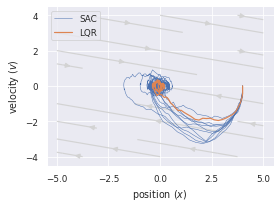

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.streamplot(xv, vv, qx, qv, density=.3, color='lightgrey')

for X in info_sac['X']:
    ax.plot(X[:,0], X[:,1], linewidth=.5, color=palette[0])
ax.plot([], [], linewidth=.5, color=palette[0], label='SAC')

X = info_lqr['X']
ax.plot(X[:,0], X[:,1], color=palette[1], label='LQR')

ax.set_xlim([-5.5, 5.5])
ax.set_ylim([-4.5, 4.5])
ax.set_xticks(np.linspace(-5, 5, 5))
ax.set_yticks(np.linspace(-4, 4, 5))

ax.set_xlabel(r'position ($x$)')
ax.set_ylabel(r'velocity ($v$)')

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_trajectory.png'
plt.savefig(figurename, dpi=300)

plt.show()

## Box-plots

In [33]:
def test_SAC(key, controller, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_SAC(env, controller, keys[i], T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

method = 'SAC'
system = 'orbital'

I = 10

key = jrandom.PRNGKey(0)
x0_space = jrandom.uniform(key, (I,2), minval=-10, maxval=10)
env = Orbital_SDI()
env.v = jnp.identity(2) * 0

In [35]:
# controller = SAC.load('sb_sac_linear')
# R_sb = test_SAC(key, controller.predict, env, x0_space)
# filename = f'data/SAC/linear/stable_baseline_R.pickle'
# with open(filename, 'wb') as handle:
#     pickle.dump(R_sb, handle, protocol=pickle.HIGHEST_PROTOCOL)

Nep = 10000
R_jax = np.zeros((10, I))
for idx in range(10):
    filename = f'models/{method}/{system}/0/{Nep}/{idx}.pickle'
    with open(filename, 'rb') as file:
        agent = pickle.load(file)
    controller = agent['pi']
    R_jax[idx,:] = test_SAC(key, controller, env, x0_space)
filename = f'data/{method}/{system}/sac_jax_R.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(R_jax, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [36]:
def test_LQR(key, LQR, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_LQR(env, LQR, T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

LQR = LQRSolver(env.A, env.B, env.G, env.R)
R_lqr = test_LQR(key, LQR, env, x0_space)

filename = f'data/{method}/{system}/lqr_R.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(R_lqr, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [34]:
R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

filename = f'data/{method}/{system}/sac_jax_R.pickle'
with open(filename, 'rb') as handle:
    R_jax = pickle.load(handle)

filename = f'data/{method}/{system}/lqr_R.pickle'
with open(filename, 'rb') as handle:
    R_lqr = pickle.load(handle)


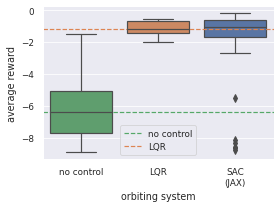

In [35]:
fig, ax = plt.subplots(figsize=(4, 3))

colors = [palette[2], palette[1], palette[0]]

sns.boxplot(data=[R_zero, R_lqr, R_jax.flatten()], palette=colors, ax=ax)

plt.axhline(y=np.median(R_zero), color=palette[2], linestyle='--', label='no control')
plt.axhline(y=np.median(R_lqr), color=palette[1], linestyle='--', label='LQR')

#ax.set_yscale('symlog')

#ax.set_xlabel('implementation')
ax.set_ylabel('average reward')
#ax.set_ylim([-4*10**4, 0])

ax.set_xticklabels(['no control', 'LQR', 'SAC\n(JAX)'])
#ax.set_xlabel('LQ system')
#ax.set_xlabel('box-constrained system')
ax.set_xlabel('orbiting system')

ax.legend(loc='lower center')

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_V{noise}_boxplot.png'
plt.savefig(figurename, dpi=300)

plt.show()

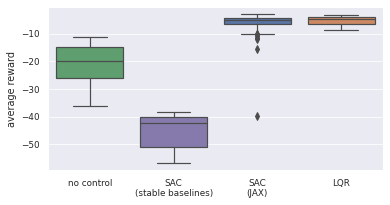

In [15]:
# filename = f'data/{method}/{system}/stable_baseline_R.pickle'
# with open(filename, 'rb') as handle:
#     R_sb = pickle.load(handle)

fig, ax = plt.subplots(figsize=(6, 3))

colors = [palette[2], palette[4], palette[0], palette[1]]

sns.boxplot(data=[R_zero, R_sb, R_jax.flatten(), R_lqr], palette=colors, ax=ax)
#ax.set_xlabel('implementation')
ax.set_ylabel('average reward')
#ax.set_ylim([-15, 0])
ax.set_xticklabels(['no control', 'SAC\n(stable baselines)', 'SAC\n(JAX)', 'LQR'])

plt.show()

## Increasing noise

In [36]:
def test_SAC(key, controller, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_SAC(env, controller, keys[i], T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

In [4]:
I = 10

key = jrandom.PRNGKey(0)
x0_space = jrandom.uniform(key, (I,2), minval=-10, maxval=10)
env = Orbital_SDI()
env.v = jnp.identity(2) * 0

for noise in [.1, .2, .3, .4, .5]:
    env.v = jnp.identity(2) * noise
    Nep = 10000
    R_jax = np.zeros((5, I))
    for idx in range(5):
        filename = f'models/SAC/orbital/{noise}/{Nep}/{idx}.pickle'
        with open(filename, 'rb') as file:
            agent = pickle.load(file)
        controller = agent['pi']
        R_jax[idx,:] = test_SAC(key, controller, env, x0_space)
    filename = f'data/SAC/orbital/sac_jax_R{noise}.pickle'
    with open(filename, 'wb') as handle:
        pickle.dump(R_jax, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [38]:
def test_LQR(key, LQR, env, x0_space, T=20, dt=.1):
    I = len(x0_space)
    keys = jrandom.split(key, I)
    R = np.zeros(I)
    for i, x0 in enumerate(x0_space):
        _, _, _, rew = run_LQR(env, LQR, T=T, dt=dt, x0=x0)
        R[i] = np.sum(rew) / T
    return R

env.v = jnp.identity(2) * 0
LQR = LQRSolver(env.A, env.B, env.G, env.R)
R_lqr = test_LQR(key, LQR, env, x0_space)


In [37]:
R_zero = test_SAC(key, lambda x, y: (0, 0), env, x0_space)

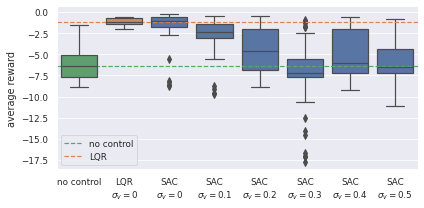

In [39]:
method = 'SAC'
system = 'orbital'

data = [R_zero, R_lqr]
noise_levels = [0, .1, .2, .3, .4, .5]
for noise in noise_levels:
    filename = f'data/{method}/{system}/sac_jax_R{noise}.pickle'
    with open(filename, 'rb') as file:
        R = pickle.load(file)
        data += [R]

fig, ax = plt.subplots(figsize=(6, 3))
colors = [palette[2], palette[1]] + [palette[0]] * (len(data) - 2)
sns.boxplot(data=data, palette=colors, ax=ax)

plt.axhline(y=np.median(R_zero), color=palette[2], linestyle='--', label='no control')
plt.axhline(y=np.median(R_lqr), color=palette[1], linestyle='--', label='LQR')

#ax.set_xlabel(r'observation noise ($\sigma_v$)')
ax.set_ylabel('average reward')

ax.set_xticklabels(['no control', fr'LQR\n$\sigma_v=0$'.replace(r'\n', '\n')] + [fr'SAC\n$\sigma_v=${noise}'.replace(r'\n', '\n') for noise in noise_levels])

ax.legend()

plt.tight_layout()

figurename = f'figures/{method}/{method}_{system}_boxplot_varyingNoise.png'
plt.savefig(figurename, dpi=300)

plt.show()
